In [ ]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

In [ ]:
!unzip cell_images.zip

In [ ]:
!apt install tree
!tree --dirsfirst --filelimit 10 /content/cell_images/ # Data directory structure

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(tf.__version__)

2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
path ='/content/cell_images' 
# path where cell images are stored

In [6]:
img_width,img_height = 32,32  #setting the size of each image to 32,32,3 pixels
m = 27558

In [7]:
datagen = ImageDataGenerator(rescale=1/255.0) #we rescale the images for tSNE

In [8]:
train_data_generator = datagen.flow_from_directory(directory=path, target_size=(img_width,img_height),
                                                    class_mode='binary',batch_size=m, subset = 'training')

Found 27558 images belonging to 2 classes.


In [9]:
x_data = train_data_generator[0][0] #dataset as a tensor
m,width,height,dim = x_data.shape
x_flatten = x_data.reshape(x_data.shape[0],-1).T

In [10]:
y_flatten = train_data_generator[0][1].reshape(1,m)

In [11]:
print(x_flatten.shape, y_flatten.shape)

(3072, 27558) (1, 27558)


# Implementing tSNE

**t-distributed Stochastic Neighbor Embedding** is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization.

In [15]:
from sklearn.manifold import TSNE

In [18]:
## generating 1000 random points between (0,m)
def get_random_points(start,end,no_points):
    a = np.arange(start,end,1)
    np.random.shuffle(a)
    a_reduced = a[:no_points]
    return a_reduced

In [21]:
no_points = 1000

n = get_random_points(start=0,end=m,no_points=no_points)
x_reduced,y_reduced = x_flatten.T[n], y_flatten.T[n]
print(x_reduced.shape,y_reduced.shape)

(1000, 3072) (1000, 1)


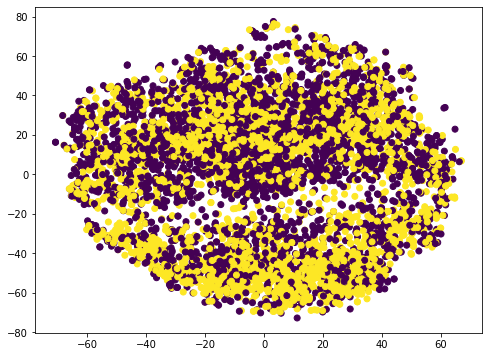

In [20]:
model = TSNE(n_components=2,perplexity=30,n_iter=5000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(x_reduced)

# Done using 5000 training samples ; 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

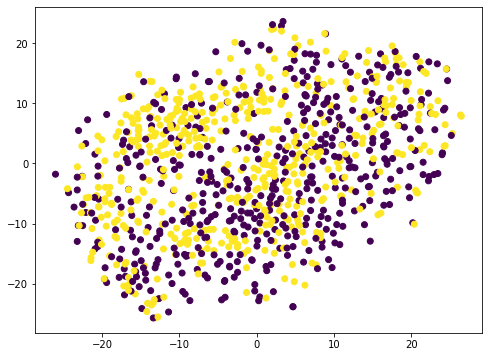

In [28]:
model = TSNE(n_components=2,perplexity=50,n_iter=5000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(x_reduced)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

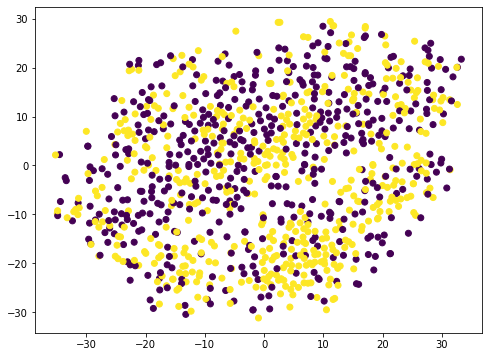

In [23]:
model = TSNE(n_components=2,perplexity=40,n_iter=10000,learning_rate=10,random_state=0)
tsne_data = model.fit_transform(x_reduced)

# changed perplexity to 40 and iterations to 10k, however the plot seems to not change

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

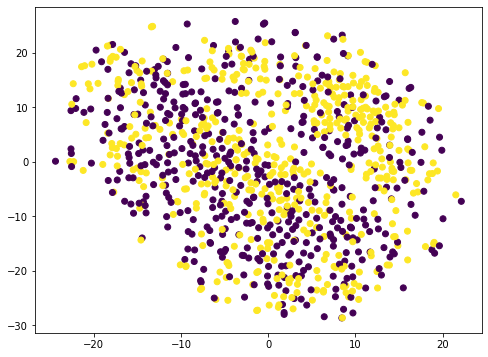

In [29]:
model = TSNE(n_components=2,perplexity=50,n_iter=1000,d=10,random_state=0)
tsne_data = model.fit_transform(x_reduced)

# increased perplexity to 50 and n_iter was decreased to 1000

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

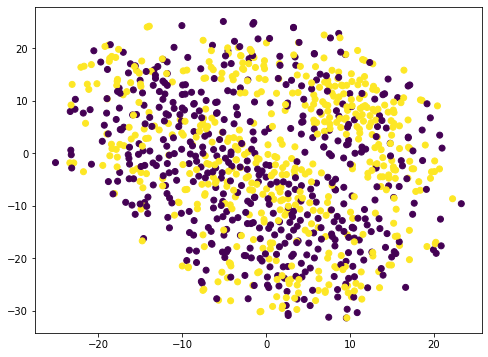

In [30]:
model = TSNE(n_components=2,perplexity=50,n_iter=5000,random_state=0)
tsne_data = model.fit_transform(x_reduced)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c=y_reduced)
plt.show()

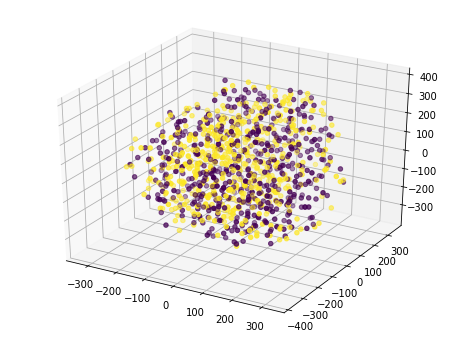

In [24]:
model = TSNE(n_components=3,perplexity=50,n_iter=6000,random_state=0)
tsne_data = model.fit_transform(x_reduced)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:,0],tsne_data[:,1],tsne_data[:,2],c=y_reduced)
plt.show()

# Few Inferences

1.   tSNE plots did not give any satisfactory decision boundry between the two classes [Parasitized & Uninfected]
2.   Even after exploring a few range of parameters, no satisfactory clusters were obtained. The dataset seems to have high noise and nonlinear projections obtained with tSNE fail to separate them.
3. It might be a possibility that a few images were misidentified by the expert. These show up as false positives and false negatives in the dataset, thereby contributing to more noise.

**Further thoughts** : Try implementing tSNE on 3D and play around to find any prospective decision boundry or presensce of any clustering. 